In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Correcnt Directroty
import os
print(os.getcwd())

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Taking the raw data UCI Irvine
source : https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset

In [ ]:
#load dataset
dataset1 = pd.read_csv('/content/drive/MyDrive/Project/PhiUSIIL_Phishing_URL_Dataset.csv')

#Basic Analysis for 10 Data

In [ ]:
dataset1.sample(5)

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
32803,85042.txt,https://www.concordtheatricals.com,33,www.concordtheatricals.com,26,0,com,100.000000,1.00000,0.522907,...,0,0,1,12,1,14,39,6,45,1
33136,mw53725.txt,http://www.ubuixdet.ga,21,www.ubuixdet.ga,15,0,ga,61.004273,1.00000,0.000226,...,0,0,0,0,0,0,0,0,0,0
192783,416624.txt,https://www.logoai.com,21,www.logoai.com,14,0,com,100.000000,1.00000,0.522907,...,1,0,0,59,9,26,85,0,83,1
150637,8069998.txt,https://www.growththin.top/,27,www.growththin.top,18,0,top,73.333333,1.00000,0.000275,...,0,0,0,0,0,0,0,0,0,0
62587,8104606.txt,https://maildinshaakckjnw548.firebaseapp.com/,45,maildinshaakckjnw548.firebaseapp.com,36,0,com,49.385610,0.65625,0.522907,...,0,0,0,0,0,0,0,0,3,0


In [ ]:
#Show all features
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

#EDA ( Exploratory Data Analysis )

In [ ]:
dataset1.shape

(235795, 56)

#CHECK NULL VALUE

In [ ]:
dataset1.isnull().sum()

,0
FILENAME,0
URL,0
URLLength,0
Domain,0
DomainLength,0
IsDomainIP,0
TLD,0
URLSimilarityIndex,0
CharContinuationRate,0
TLDLegitimateProb,0


In [ ]:
dataset1.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


#Import seaborn:
seaborn (imported as sns) is a Python library for making pretty and informative statistical graphics. It’s built on top of matplotlib but looks much nicer and is easier for some common plots.

#Use sns.boxplot():
A boxplot is a type of graph that shows the distribution of a variable — its median, quartiles, and possible outliers.

When you do sns.boxplot(phiUSIIL['URLLength']), you're specifically:

*   Taking the column URLLength from your dataframe phiUSIL
*   Plotting its distribution as a boxplot to visually check things like:



1.What’s the median URL length?

2.How spread out are the lengths?

3.Are there some URLs that are super long (outliers)?



#Box plot

<Axes: ylabel='URLLength'>

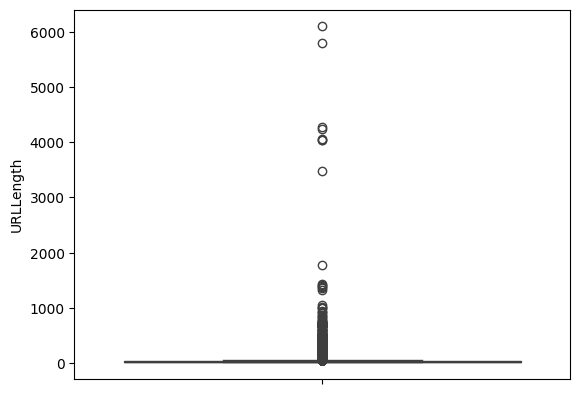

In [ ]:
import seaborn as sns
sns.boxplot(dataset1['URLLength'])

#📈 What We See Here:
Most URLs are short — the box in the plot is small and close to the bottom, indicating that a large number of URLs have relatively short lengths.
Many extreme outliers exist, with some URL lengths going as high as 6000+ characters. These are likely unusual or deliberately obfuscated URLs often seen in phishing attempts.
The outliers in the box plot are defined as values greater than:

**Outlier Threshold
=
Q
3
+
1.5
×
IQR**

Where:


*   Q3 = 75th percentile (upper quartile)

*   IQR = Interquartile Range = Q3 - Q1

The dots above the whiskers in the plot represent such extreme values.



#Identify Highly Correlated Features


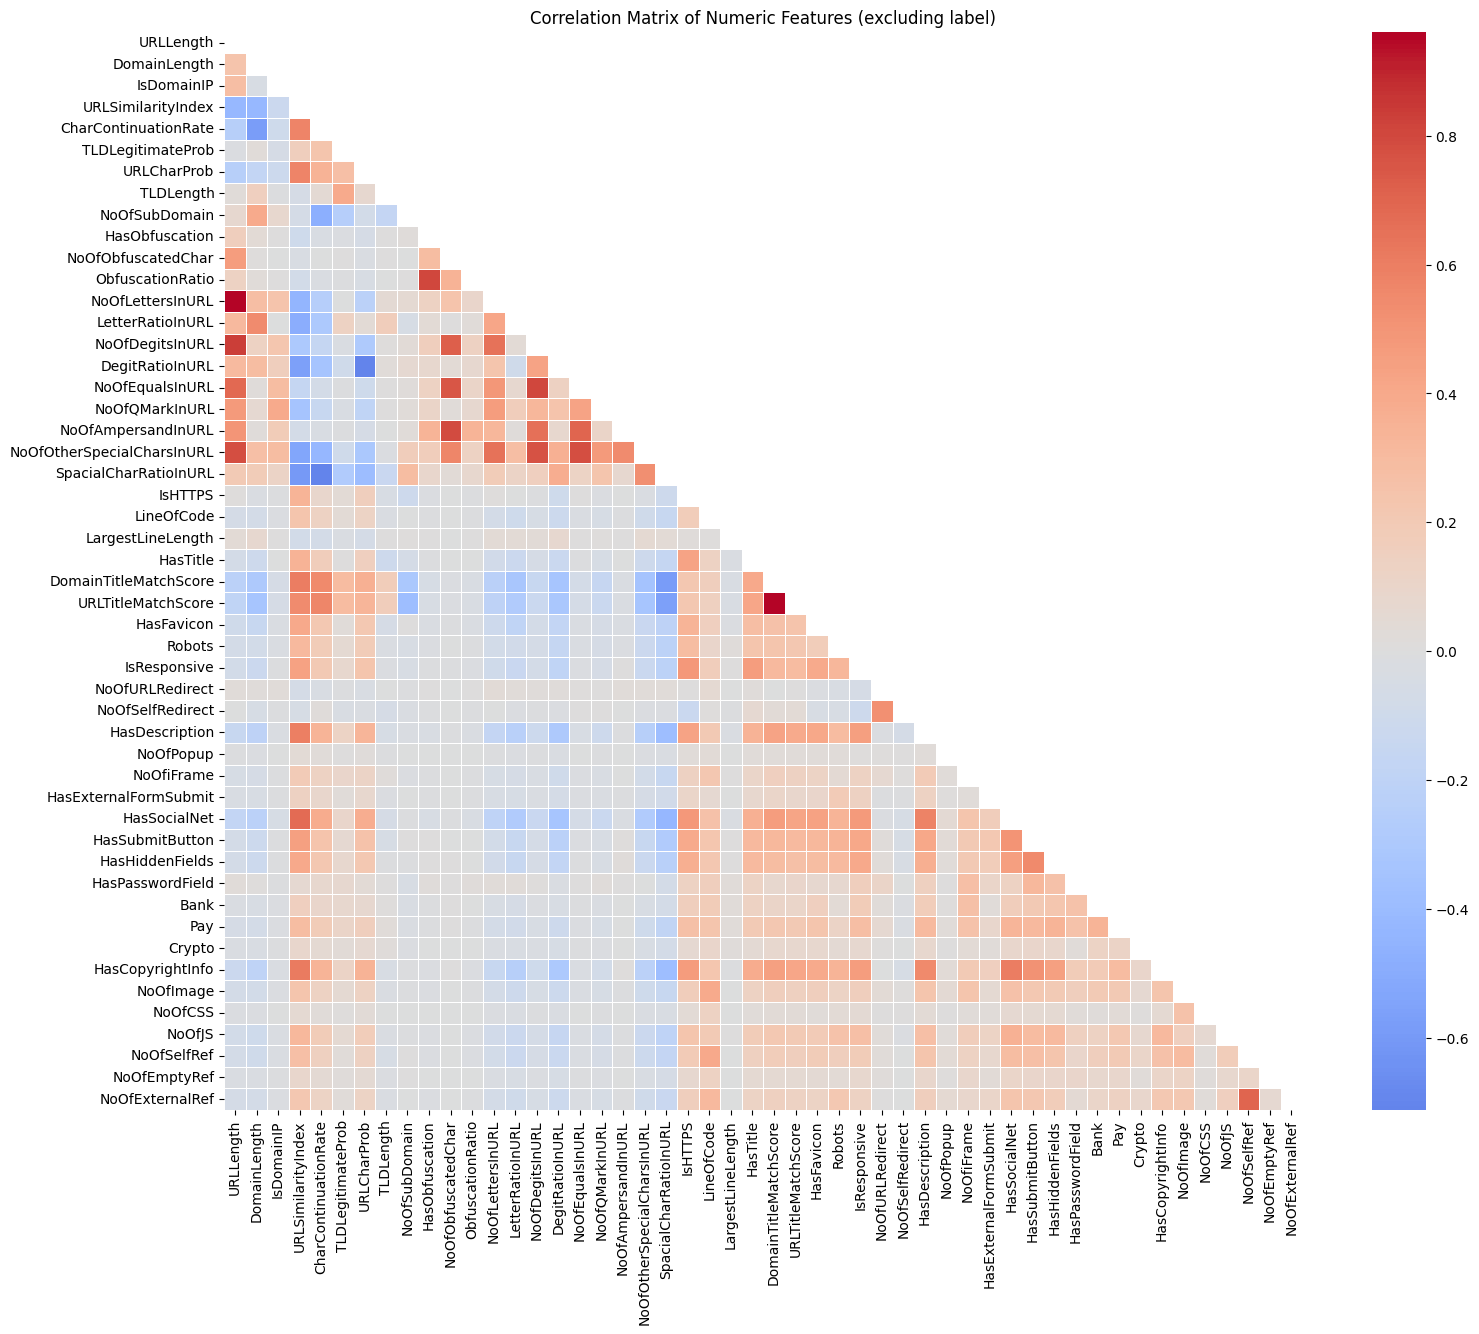

In [ ]:
import matplotlib.pyplot as plt
# Drop non-numeric columns temporarily for correlation check
numeric_df = dataset1.select_dtypes(include=[np.number]).drop(columns=['label'])  # phiUSIIL is dataset (probably a DataFrame).
#✅This line selects only the numeric columns (ignores text, dates, etc.).
#✅Then it drops the column 'label', because you probably don't want to include the target variable (label) when checking feature correlations.

# Calculate the correlation matrix
corr_matrix = numeric_df.corr() #Calculates the correlation matrix.
#Each value shows the correlation coefficient between two features:
#+1 = perfect positive correlation
#-1 = perfect negative correlation
#0 = no correlation



# Create a mask to hide the upper triangle (to reduce duplicate values)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
#np.triu() creates a mask that covers the upper triangle of the correlation matrix.
#Correlation matrices are symmetric (feature A with feature B = feature B with feature A), so hiding half avoids redundancy.



# Set up the matplotlib figure
plt.figure(figsize=(18, 14))

# Draw the heatmap
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', center=0,
            square=True, linewidths=.5, annot=False, fmt=".2f")
#Uses Seaborn’s heatmap function:
#corr_matrix is what we plot.
#mask=mask hides the top triangle.
#cmap='coolwarm' gives a color range (blue for negative, red for positive correlations).
#center=0 centers the color map at zero.
#square=True makes the boxes square.
#linewidths=.5 draws thin white lines between boxes.
#annot=False means no numbers inside boxes (cleaner look).
#fmt=".2f" would format numbers if annot=True.



plt.title("Correlation Matrix of Numeric Features (excluding label)")
plt.show()

#List Highly Correlated Pairs (> 0.85)


In [ ]:
# Flatten correlation matrix and sort
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)

# Remove self correlations
corr_pairs = corr_pairs[corr_pairs < 1.0]

# Filter to show only those above 0.85 (or choose your threshold)
high_corr = corr_pairs[corr_pairs > 0.85]
print(high_corr)

DomainTitleMatchScore  URLTitleMatchScore       0.961008
URLTitleMatchScore     DomainTitleMatchScore    0.961008
URLLength              NoOfLettersInURL         0.956047
NoOfLettersInURL       URLLength                0.956047
dtype: float64


#Find Low Correlation Features


In [ ]:
# Get correlation of features with the target
correlation_with_label = dataset1.corr(numeric_only=True)['label'].sort_values()

# View low-correlation features
low_corr_features = correlation_with_label[correlation_with_label.abs() < 0.05]
print("Low-correlation features:\n", low_corr_features)

Low-correlation features:
 NoOfURLRedirect      -0.046456
ObfuscationRatio     -0.041915
LargestLineLength    -0.041111
NoOfAmpersandInURL   -0.034622
NoOfObfuscatedChar   -0.015315
NoOfSubDomain        -0.005955
NoOfPopup             0.047391
Name: label, dtype: float64


#Drop Low-Correlation Features


In [ ]:
#  Manually define the weakest ones to drop
features_to_drop = [
    'NoOfObfuscatedChar',
    'NoOfSubDomain',
    'LargestLineLength',
    'NoOfAmpersandInURL'
]

dataset1_reduced = dataset1.drop(columns=features_to_drop)

# Step 4: Optional - Print before/after shape
print("\n✅ Shape before:", dataset1.shape)
print("✅ Shape after dropping low-correlation features:", dataset1_reduced.shape)



✅ Shape before: (235795, 56)
✅ Shape after dropping low-correlation features: (235795, 52)


#Combine Redundant Features (If Present)

In [ ]:
def combine_redundant_features(df):
    import numpy as np

    combined_features = {
        'LetterStats': ['NoOfLettersInURL', 'LetterRatioInURL'],
        'DigitStats': ['NoOfDegitsInURL', 'DegitRatioInURL'],
        'ObfuscationCombined': ['ObfuscationRatio', 'NoOfObfuscatedChar'],
        'TitleMatchScore': ['DomainTitleMatchScore', 'URLTitleMatchScore'],
        'SelfEmptyExternalRef': ['NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef']
    }

    for new_col, old_cols in combined_features.items():
        # Check if all required columns exist
        if all(col in df.columns for col in old_cols):
            # Combine using mean (you can also use sum or weighted avg)
            df[new_col] = df[old_cols].mean(axis=1)
            # Drop old columns
            df.drop(columns=old_cols, inplace=True)
            print(f"✅ Combined {old_cols} into '{new_col}' and dropped originals.")
        else:
            print(f"❌ Skipped {old_cols} — one or more columns not found.")

    return df

# Apply to your reduced DataFrame
dataset1_final = combine_redundant_features(dataset1_reduced)

# Final shape
print("\n📐 Final DataFrame shape:", dataset1_final.shape)

✅ Combined ['NoOfLettersInURL', 'LetterRatioInURL'] into 'LetterStats' and dropped originals.
✅ Combined ['NoOfDegitsInURL', 'DegitRatioInURL'] into 'DigitStats' and dropped originals.
❌ Skipped ['ObfuscationRatio', 'NoOfObfuscatedChar'] — one or more columns not found.
✅ Combined ['DomainTitleMatchScore', 'URLTitleMatchScore'] into 'TitleMatchScore' and dropped originals.
✅ Combined ['NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef'] into 'SelfEmptyExternalRef' and dropped originals.

📐 Final DataFrame shape: (235795, 47)


In [ ]:
# install xgboost
!pip install xgboost

#Train-Test Split + Feature Scaling


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split features and target
X = dataset1_final.drop(columns=['label'])
y = dataset1_final['label']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric columns (you can adjust this if needed)
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Scaling numeric features
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])


#Remove non-numeric columns (REMOVE STRING)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Drop columns with string data (e.g., URLs) from the features
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])
X_test_numeric = X_test.select_dtypes(include=['float64', 'int64'])

#MODEL TRANING



*   DecissionTree
*   Naive Bayes

*   KNeighbors
*   RandomForestClassifier

*   LogisticRegression
*   XGBoost

*   Multi-Layer Perceptron (MLP)
*   Support Vector Machine (SVM)




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Initialize and train models
models = {
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "NaiveBayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n🔍 Training {name}...")

    # Fit the model using only numeric data
    model.fit(X_train_numeric, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test_numeric)

    # Evaluate the model
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"✅ Accuracy: {acc:.4f}")
    print(f"🎯 F1 Score: {f1:.4f}")
    print(f"📋 Classification Report:\n{classification_report(y_test, y_pred)}")



🔍 Training DecisionTree...
✅ Accuracy: 1.0000
🎯 F1 Score: 1.0000
📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159


🔍 Training RandomForest...
✅ Accuracy: 1.0000
🎯 F1 Score: 1.0000
📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159


🔍 Training LogisticRegression...
✅ Accuracy: 0.9999
🎯 F1 Score: 0.9999
📋 Classification Report:
              precision    recall  f1-score   support

           0

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:17:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Accuracy: 1.0000
🎯 F1 Score: 1.0000
📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159


🔍 Training SVM...
✅ Accuracy: 0.9998
🎯 F1 Score: 0.9999
📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159


🔍 Training MLP...
✅ Accuracy: 1.0000
🎯 F1 Score: 1.0000
📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
          

#Corresponding Confusion Matrix

In [ ]:
pip install seaborn matplotlib


🔍 Training DecisionTree...
✅ Accuracy: 1.0000
🎯 F1 Score: 1.0000
📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159

📊 Confusion Matrix:
[[20124     0]
 [    0 27035]]
🔹 True Positive (TP): 27035
🔹 True Negative (TN): 20124
🔹 False Positive (FP): 0
🔹 False Negative (FN): 0


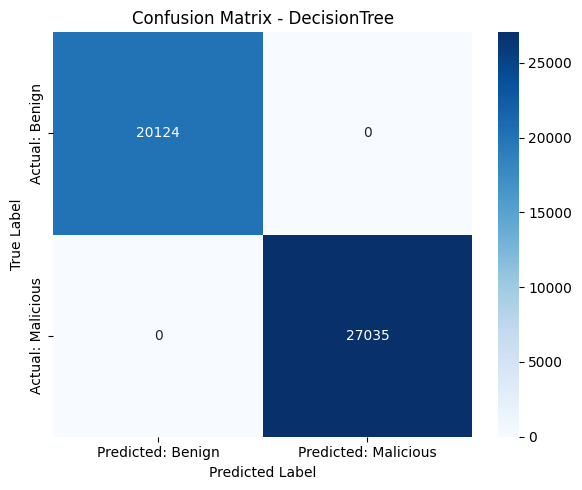


🔍 Training RandomForest...
✅ Accuracy: 1.0000
🎯 F1 Score: 1.0000
📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159

📊 Confusion Matrix:
[[20124     0]
 [    0 27035]]
🔹 True Positive (TP): 27035
🔹 True Negative (TN): 20124
🔹 False Positive (FP): 0
🔹 False Negative (FN): 0


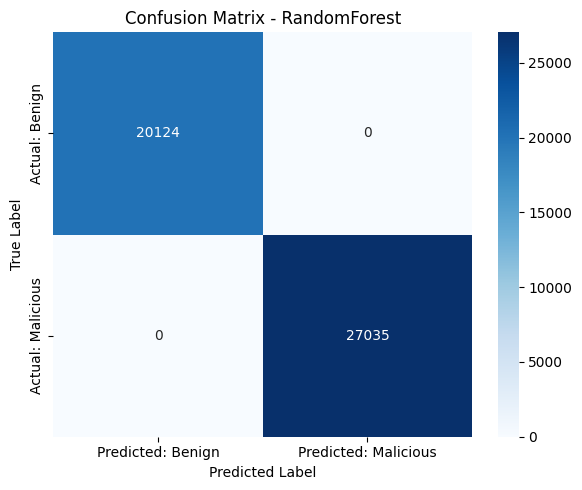


🔍 Training LogisticRegression...
✅ Accuracy: 0.9999
🎯 F1 Score: 0.9999
📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159

📊 Confusion Matrix:
[[20118     6]
 [    0 27035]]
🔹 True Positive (TP): 27035
🔹 True Negative (TN): 20118
🔹 False Positive (FP): 6
🔹 False Negative (FN): 0


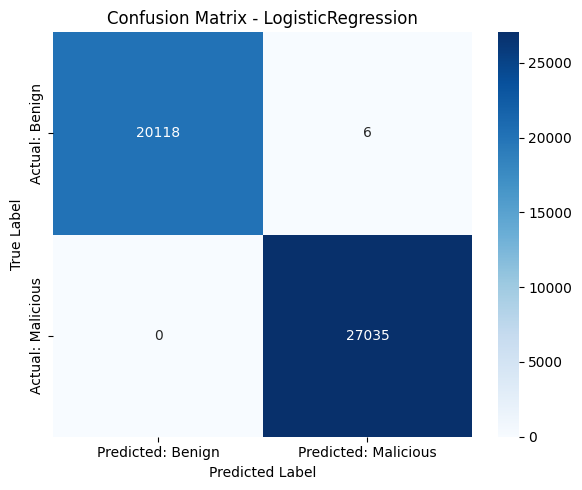


🔍 Training NaiveBayes...
✅ Accuracy: 0.9997
🎯 F1 Score: 0.9997
📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159

📊 Confusion Matrix:
[[20121     3]
 [   13 27022]]
🔹 True Positive (TP): 27022
🔹 True Negative (TN): 20121
🔹 False Positive (FP): 3
🔹 False Negative (FN): 13


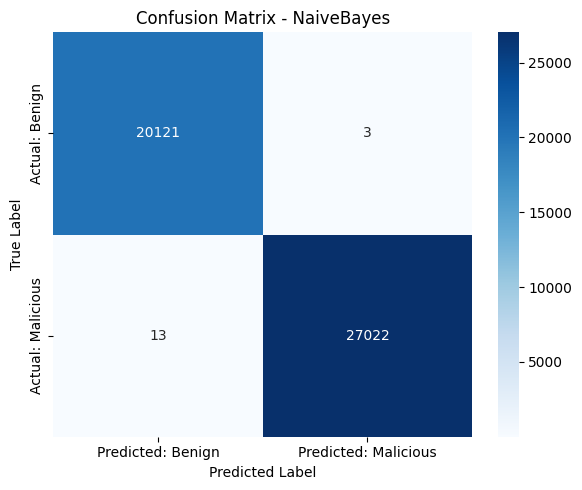


🔍 Training KNN...
✅ Accuracy: 0.9980
🎯 F1 Score: 0.9983
📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159

📊 Confusion Matrix:
[[20058    66]
 [   27 27008]]
🔹 True Positive (TP): 27008
🔹 True Negative (TN): 20058
🔹 False Positive (FP): 66
🔹 False Negative (FN): 27


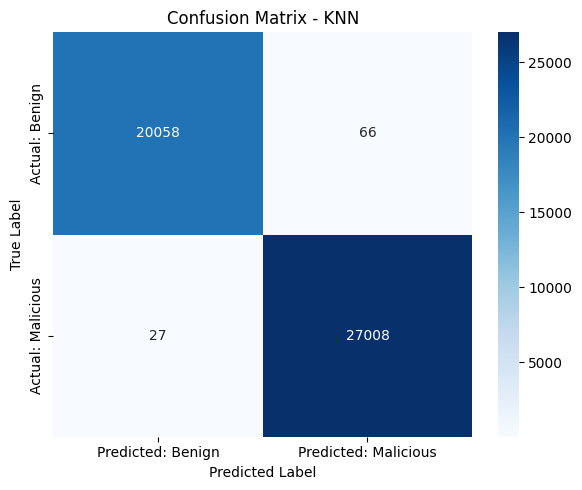


🔍 Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:13:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Accuracy: 1.0000
🎯 F1 Score: 1.0000
📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159

📊 Confusion Matrix:
[[20123     1]
 [    0 27035]]
🔹 True Positive (TP): 27035
🔹 True Negative (TN): 20123
🔹 False Positive (FP): 1
🔹 False Negative (FN): 0


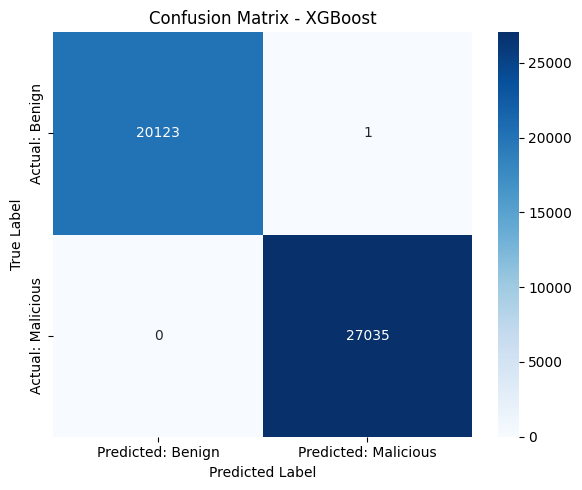


🔍 Training SVM...
✅ Accuracy: 0.9998
🎯 F1 Score: 0.9999
📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159

📊 Confusion Matrix:
[[20116     8]
 [    0 27035]]
🔹 True Positive (TP): 27035
🔹 True Negative (TN): 20116
🔹 False Positive (FP): 8
🔹 False Negative (FN): 0


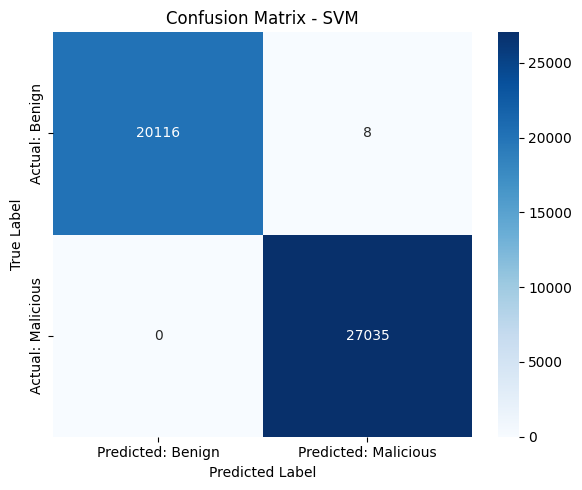


🔍 Training MLP...
✅ Accuracy: 1.0000
🎯 F1 Score: 1.0000
📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159

📊 Confusion Matrix:
[[20122     2]
 [    0 27035]]
🔹 True Positive (TP): 27035
🔹 True Negative (TN): 20122
🔹 False Positive (FP): 2
🔹 False Negative (FN): 0


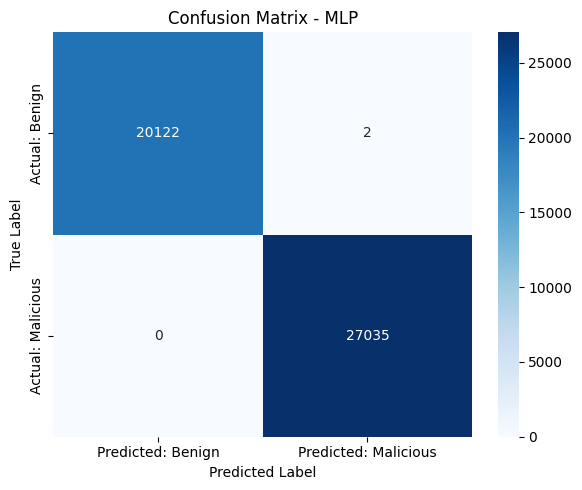

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Train and evaluate each model
for name, model in models.items():
    print(f"\n🔍 Training {name}...")

    # Fit the model
    model.fit(X_train_numeric, y_train)

    # Predict
    y_pred = model.predict(X_test_numeric)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    print(f"✅ Accuracy: {acc:.4f}")
    print(f"🎯 F1 Score: {f1:.4f}")
    print(f"📋 Classification Report:\n{report}")
    print(f"📊 Confusion Matrix:\n{cm}")
    print(f"🔹 True Positive (TP): {tp}")
    print(f"🔹 True Negative (TN): {tn}")
    print(f"🔹 False Positive (FP): {fp}")
    print(f"🔹 False Negative (FN): {fn}")

    # 📉 Confusion Matrix Visualization
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted: Benign', 'Predicted: Malicious'],
                yticklabels=['Actual: Benign', 'Actual: Malicious'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

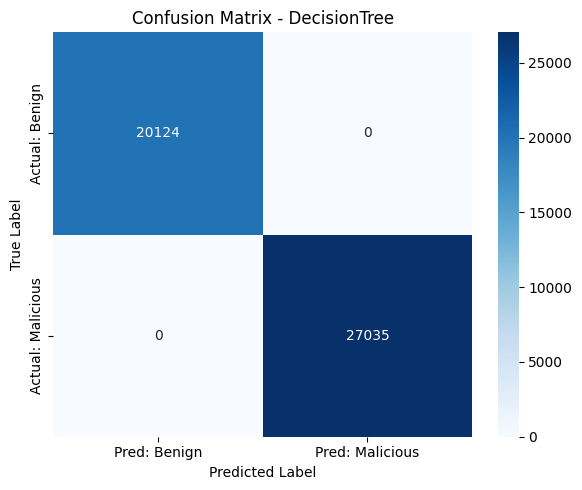

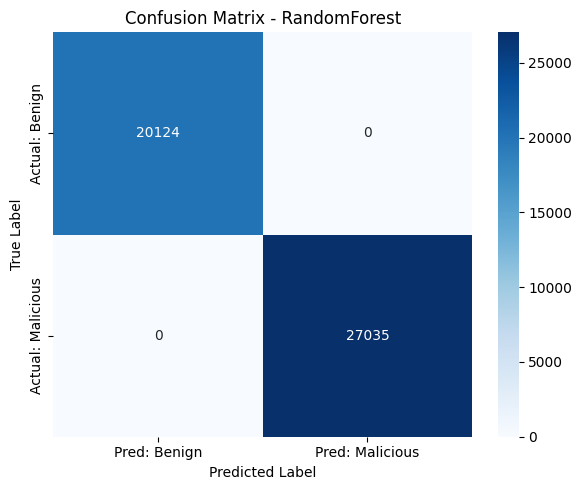

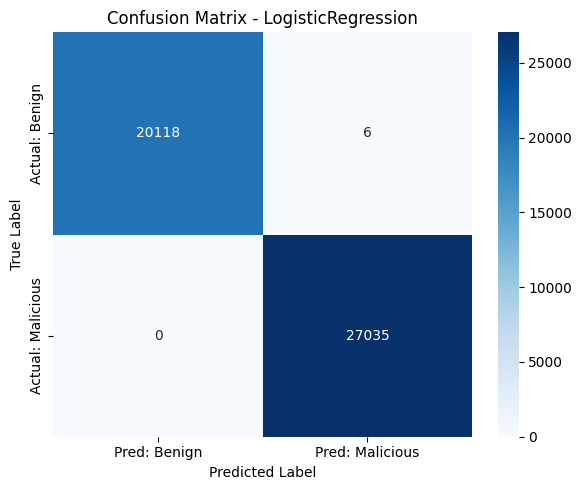

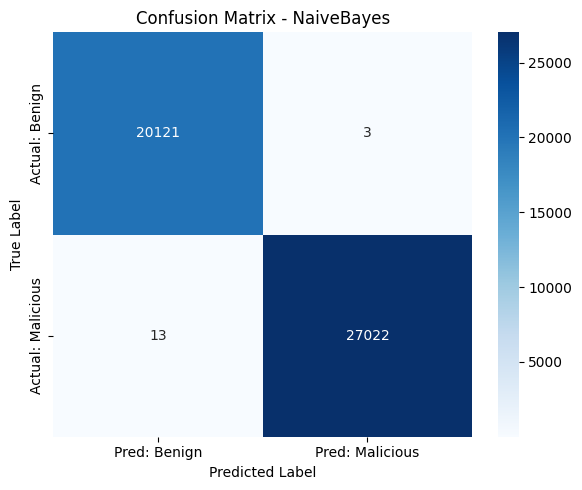

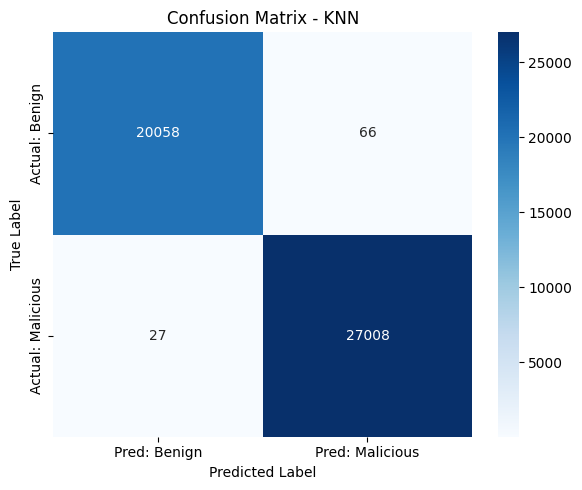

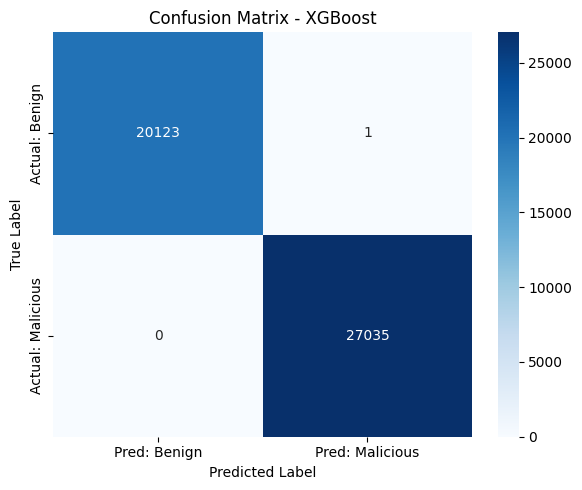

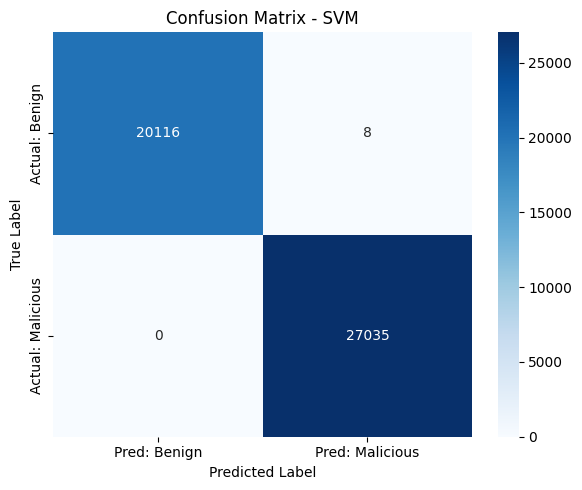

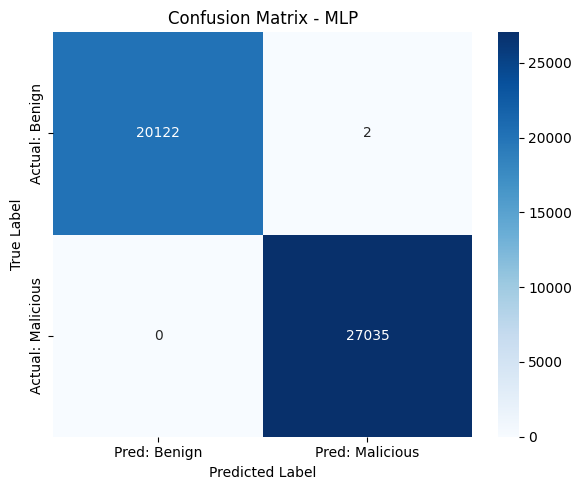

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate and visualize confusion matrices for all trained models
for name, model in models.items():
    # Predict
    y_pred = model.predict(X_test_numeric)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Pred: Benign', 'Pred: Malicious'],
                yticklabels=['Actual: Benign', 'Actual: Malicious'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

#✅ Accuracy & Precision Bar Chart

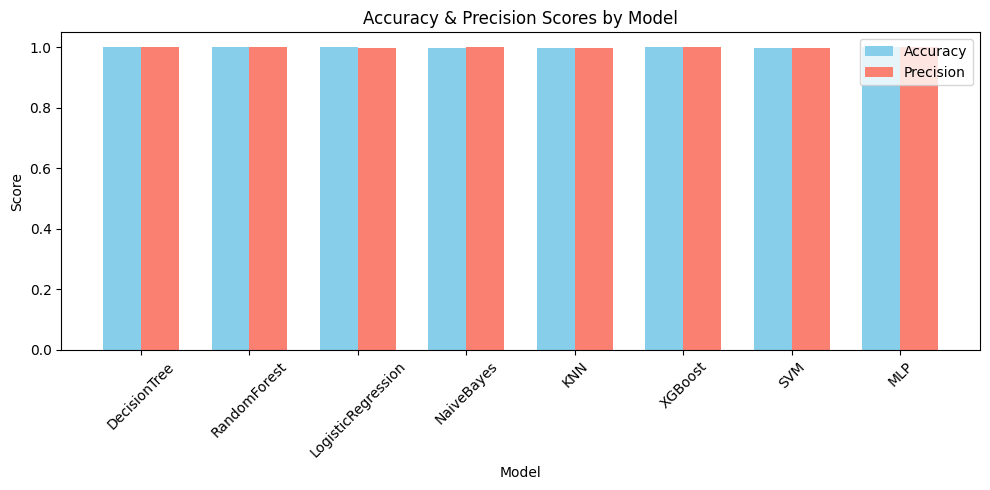

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score

# Store results
accuracy_scores = {}
precision_scores = {}

# Collect scores
for name, model in models.items():
    y_pred = model.predict(X_test_numeric)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    precision_scores[name] = precision_score(y_test, y_pred)

# Plot
plt.figure(figsize=(10, 5))
bar_width = 0.35
model_names = list(models.keys())

# Bar positions
x = range(len(models))
acc = [accuracy_scores[m] for m in model_names]
prec = [precision_scores[m] for m in model_names]

plt.bar(x, acc, width=bar_width, label='Accuracy', color='skyblue')
plt.bar([i + bar_width for i in x], prec, width=bar_width, label='Precision', color='salmon')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Accuracy & Precision Scores by Model')
plt.xticks([i + bar_width / 2 for i in x], model_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#✅ ROC Curve & AUC (Area Under Curve)

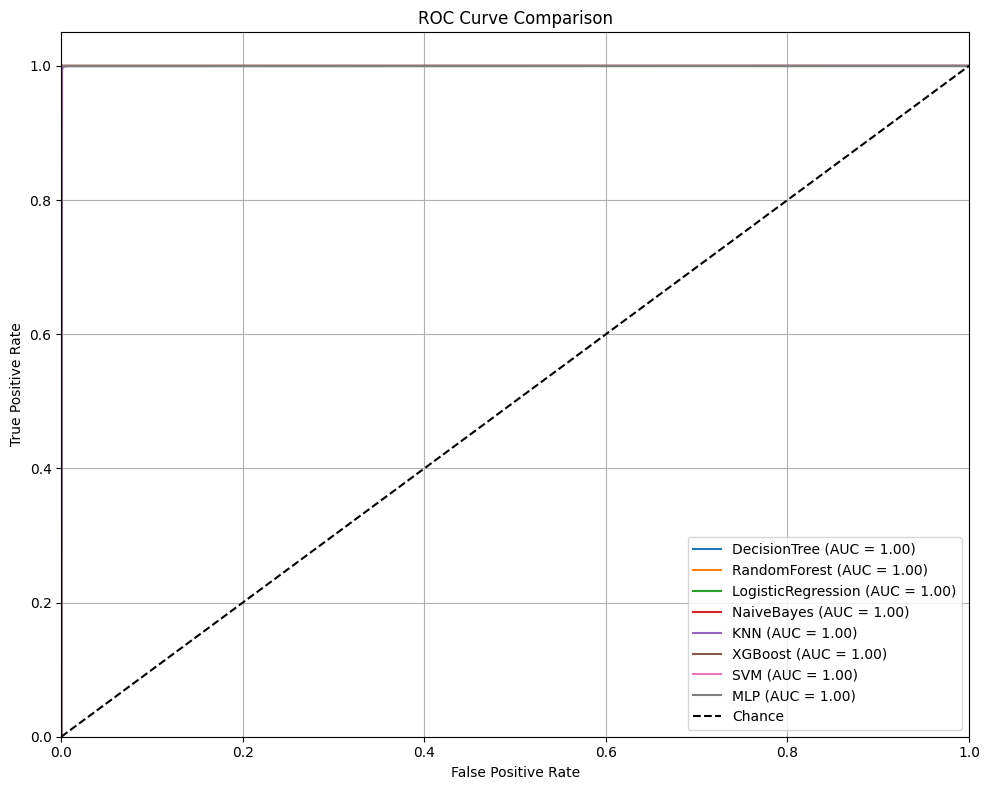

In [26]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Ensure binary labels (0 and 1)
y_true = y_test if set(y_test) == {0, 1} else label_binarize(y_test, classes=[0, 1]).ravel()

plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Some classifiers (like SVC without `probability=True`) don't support predict_proba
    try:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test_numeric)[:, 1]
        else:
            y_score = model.decision_function(X_test_numeric)
    except:
        print(f"⚠️ Skipping {name}: No probability/score output.")
        continue

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot chance line
plt.plot([0, 1], [0, 1], 'k--', label='Chance')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()